### Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os
import tqdm
import glob
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.data.experimental import AUTOTUNE
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import RandomRotation, RandomZoom
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras import applications
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.io import imread, imshow
from skimage.transform import resize

from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, AUC,Recall
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.densenet import DenseNet169
import copy
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import cv2
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.applications.vgg19 import VGG19,preprocess_input
from tensorflow.keras.utils import image_dataset_from_directory
from keras.utils import plot_model


In [20]:
!pip install visualkeras
!pip install ann_visualizer
!pip install graphviz


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\vidya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\vidya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\vidya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [22]:
!pip install -q kaggle


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\vidya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [23]:
#!/bin/bash
!kaggle datasets download marcopinamonti/alzheimer-mri-4-classes-dataset

Dataset URL: https://www.kaggle.com/datasets/marcopinamonti/alzheimer-mri-4-classes-dataset
License(s): unknown




  0%|          | 0.00/34.1M [00:00<?, ?B/s]
  3%|▎         | 1.00M/34.1M [00:01<00:44, 780kB/s]
  6%|▌         | 2.00M/34.1M [00:01<00:21, 1.56MB/s]
  9%|▉         | 3.00M/34.1M [00:01<00:13, 2.49MB/s]
 12%|█▏        | 4.00M/34.1M [00:01<00:09, 3.50MB/s]
 15%|█▍        | 5.00M/34.1M [00:01<00:07, 3.94MB/s]
 18%|█▊        | 6.00M/34.1M [00:02<00:06, 4.40MB/s]
 20%|██        | 7.00M/34.1M [00:02<00:06, 4.37MB/s]
 23%|██▎       | 8.00M/34.1M [00:02<00:06, 4.55MB/s]
 26%|██▋       | 9.00M/34.1M [00:02<00:05, 4.81MB/s]
 29%|██▉       | 10.0M/34.1M [00:03<00:05, 4.82MB/s]
 32%|███▏      | 11.0M/34.1M [00:03<00:05, 4.84MB/s]
 35%|███▌      | 12.0M/34.1M [00:03<00:05, 4.49MB/s]
 38%|███▊      | 13.0M/34.1M [00:03<00:04, 4.66MB/s]
 41%|████      | 14.0M/34.1M [00:03<00:04, 4.48MB/s]
 44%|████▍     | 15.0M/34.1M [00:04<00:03, 5.17MB/s]
 47%|████▋     | 16.0M/34.1M [00:04<00:03, 5.05MB/s]
 50%|████▉     | 17.0M/34.1M [00:04<00:03, 4.95MB/s]
 53%|█████▎    | 18.0M/34.1M [00:04<00:03, 4.90MB/s]
 5

In [24]:
!unzip -q /content/alzheimer-mri-4-classes-dataset.zip -d /content/dataset

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [26]:
import splitfolders

# Set the path of the directory containing the original images
input_folder = './Alzheimer_MRI_4_classes_dataset'

# Set the base directory for the split images
output_folder = './content/output'

# Set the ratio of images for each split
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

# Use the splitfolders library to split the images into train-validation-test sets
splitfolders.ratio(input_folder, output_folder, seed=42,
                   ratio=(train_ratio,
                          validation_ratio,
                          test_ratio))


Copying files: 6400 files [00:50, 127.74 files/s]


#  **Data Preprocessing**

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 16
IMG_SIZE = (128, 128)
SEED = 1345

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        )

validation_datagen = ImageDataGenerator(rescale=1./255)


test_datagen = ImageDataGenerator(rescale=1./255)

# Define directories for train, validation, and test sets
train_dir = 'content/output/train'
validation_dir = 'content/output/val'
test_dir = 'content/output/test'

# Define generators for train and validation sets using flow_from_directory
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        shuffle=True,
        seed = SEED,
        batch_size=64,
        class_mode ='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        seed = SEED,
        shuffle=True,
        batch_size=64,
        class_mode ='categorical')

# Define generator for test set using flow_from_directory
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        shuffle=True,
        seed = SEED,
        batch_size =64,
        class_mode ='categorical')

epochs = 50


Found 5119 images belonging to 4 classes.
Found 639 images belonging to 4 classes.
Found 642 images belonging to 4 classes.


In [29]:
train_generator_resnet = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        shuffle=True,
        seed = SEED,
        batch_size=64,
        class_mode ='categorical')
train_generator_inception = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        shuffle=True,
        seed = SEED,
        batch_size=64,
        class_mode ='categorical')

validation_generator_resnet =  validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        seed = SEED,
        shuffle=True,
        batch_size=64,
        class_mode ='categorical')
validation_generator_inception =  validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        seed = SEED,
        shuffle=True,
        batch_size=64,
        class_mode ='categorical')

#train_generator_fused = zip(train_generator_resnet, train_generator_inception)
#validation_generator_fused = zip(validation_generator_resnet, validation_generator_inception)

Found 5119 images belonging to 4 classes.
Found 5119 images belonging to 4 classes.
Found 639 images belonging to 4 classes.
Found 639 images belonging to 4 classes.


In [30]:
def combined_generator(generator1, generator2):
    while True:
        batch1 = next(generator1)
        batch2 = next(generator2)
        yield [batch1[0], batch2[0]], batch1[1]  # Combine the input batches and keep the labels the same

train_generator_fused = combined_generator(train_generator_resnet, train_generator_inception)
validation_generator_fused = combined_generator(validation_generator_resnet, validation_generator_inception)


In [31]:

class_names = list(train_generator.class_indices.keys())
class_names



['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

# **Data Visualization**

Copying files: 3746 files [03:09, 19.75 files/s] 


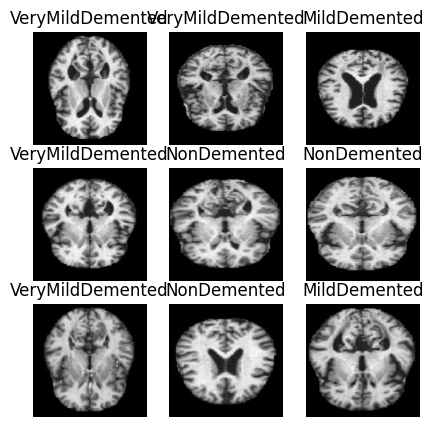

In [32]:
plt.figure(figsize=(5, 5))
for images, labels in train_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    break


## Data Augmentation

In [33]:
#preprocessing for rotation and zoom
def data_augmentar():

    data_augmentation = Sequential()
    data_augmentation.add(RandomRotation(factor=(-0.15, 0.15)))
    data_augmentation.add(RandomZoom((-0.3, -0.1)))

    return data_augmentation

In [37]:
from tensorflow.keras.layers import RandomRotation, RandomZoom
from tensorflow.keras.models import Sequential

# Define the augmentation function
def data_augmentar():
    data_augmentation = Sequential()
    data_augmentation.add(RandomRotation(factor=(-0.15, 0.15), name='random_rotation'))
    data_augmentation.add(RandomZoom(height_factor=(-0.3, -0.1), name='random_zoom'))
    return data_augmentation

# Initialize the data augmentation pipeline
data_augmentation = data_augmentar()

# Verifying using the configuration
rotation_config = data_augmentation.layers[0].get_config()
zoom_config = data_augmentation.layers[1].get_config()

# Assertions
assert data_augmentation.layers[0].name.startswith('random_rotation')
assert rotation_config['factor'] == (-0.15, 0.15), f"Unexpected factor: {rotation_config['factor']}"
assert data_augmentation.layers[1].name.startswith('random_zoom')
assert zoom_config['height_factor'] == (-0.3, -0.1), f"Unexpected height_factor: {zoom_config['height_factor']}"

print("All assertions passed!")


All assertions passed!


## Solving Imbalanced Data Problem

In [40]:
## Calculate number of samples in each class.
input_folder = 'Alzheimer_MRI_4_classes_dataset'
class_counts = dict()
for folder in class_names:
    class_counts[folder] = len(os.listdir(input_folder+'/'+folder))

class_counts

{'MildDemented': 896,
 'ModerateDemented': 64,
 'NonDemented': 3200,
 'VeryMildDemented': 2240}

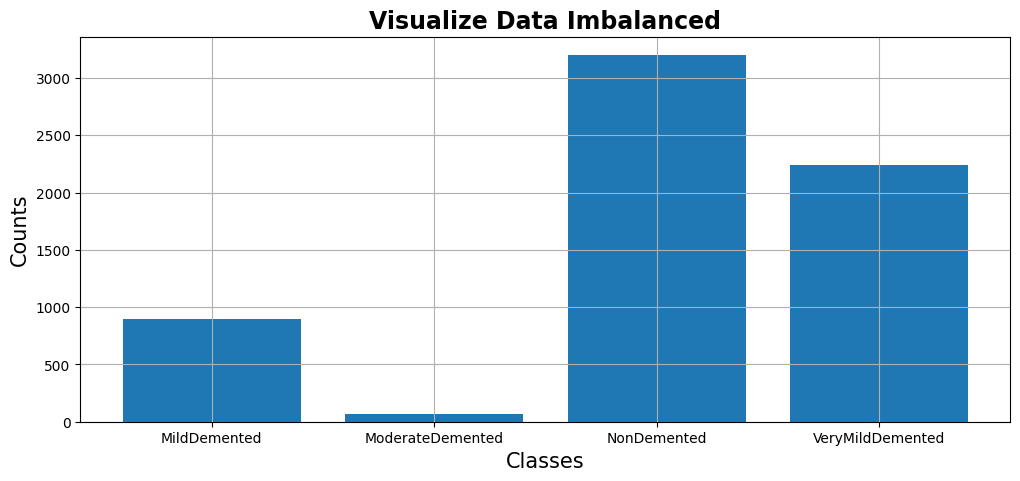

In [41]:
plt.figure(figsize=(12,5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes', fontdict={'fontsize':15})
plt.ylabel('Counts', fontdict={'fontsize':15})
plt.title('Visualize Data Imbalanced', fontdict={'fontsize':17,
                                                 'fontweight':'bold'})
plt.grid(True)
plt.show()

In [42]:
# Class_weight = (Total Number of images/Number of class x Images per class )

total = sum(class_counts.values())
number_of_classes = len([ 'MildDemented',
 'ModerateDemented',
 'NonDemented',
 'VeryMildDemented'])

class_weights = dict()
for i in range(number_of_classes):
    class_weights[i] = round(total / (number_of_classes * list(class_counts.values())[i]), 2)
    print(f'Weight for class \"{class_names[i]}\" : {class_weights[i]}')

Weight for class "MildDemented" : 1.79
Weight for class "ModerateDemented" : 25.0
Weight for class "NonDemented" : 0.5
Weight for class "VeryMildDemented" : 0.71


In [43]:
models=[]
acc=[]

#  **ResNet101**

In [44]:
base_model_2 = tf.keras.applications.ResNet101(input_shape=(128,128,3),
                                               include_top=False,
                                               weights='imagenet')
base_model_2.trainable = False


171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 40s 0us/step


In [45]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

prediction_layer = keras.layers.Dense(4,activation='softmax')

model2 = tf.keras.Sequential([base_model_2, global_average_layer,
  keras.layers.BatchNormalization(),
  keras.layers.Dense(2048, activation='relu'),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  prediction_layer
])


In [46]:

model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy',
                        tf.keras.metrics.AUC(),
                        tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(),
                        ])


# Train your model with mixed precision
history3 = model2.fit(train_generator,
                    validation_data= validation_generator,
                    steps_per_epoch=len(train_generator),
                    epochs = epochs,
                    verbose=1)


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.4901 - auc: 0.7842 - loss: 1.0440 - precision: 0.5634 - recall: 0.2908 - val_accuracy: 0.5008 - val_auc: 0.8081 - val_loss: 1.4265 - val_precision: 0.5008 - val_recall: 0.5008
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 209s 3s/step - accuracy: 0.5395 - auc: 0.8263 - loss: 0.9380 - precision: 0.6395 - recall: 0.3380 - val_accuracy: 0.5008 - val_auc: 0.8074 - val_loss: 1.0891 - val_precision: 0.5008 - val_recall: 0.4945
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 211s 3s/step - accuracy: 0.5703 - auc: 0.8455 - loss: 0.8954 - precision: 0.6829 - recall: 0.3684 - val_accuracy: 0.5023 - val_auc: 0.8115 - val_loss: 1.0046 - val_precision: 0.5525 - val_recall: 0.4444
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 240s 3s/step - accuracy: 0.5665 - auc: 0.8459 - loss: 0.8871 - precision: 0.6691 - recall: 0.3822 - val_accuracy: 0.5352 - val_auc: 0.8361 - val_loss: 0.9196 - val_precision: 0.6409 - val_recall: 0.3380
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━

In [47]:
models.append("ResNet101")
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet101 (Functional)          │ (None, 4, 4, 2048)     │    42,658,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,854,990 (224.51 MB)

 Trainable params: 5,397,572 (20.59 MB)

 Non-trainable params: 42,662,272 (162.74 MB)

 Optimizer params: 10,795,146 (41.18 MB)

In [48]:
#from keras.utils import plot_model
#plot_model(model2, to_file='modelResNet101_plot.png', show_shapes=True, show_layer_names=True)

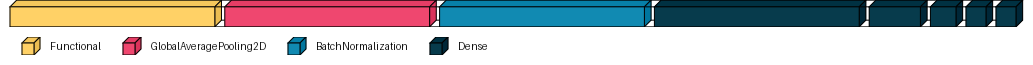

In [49]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model2, legend=True)

In [50]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

# **Plotting Results**

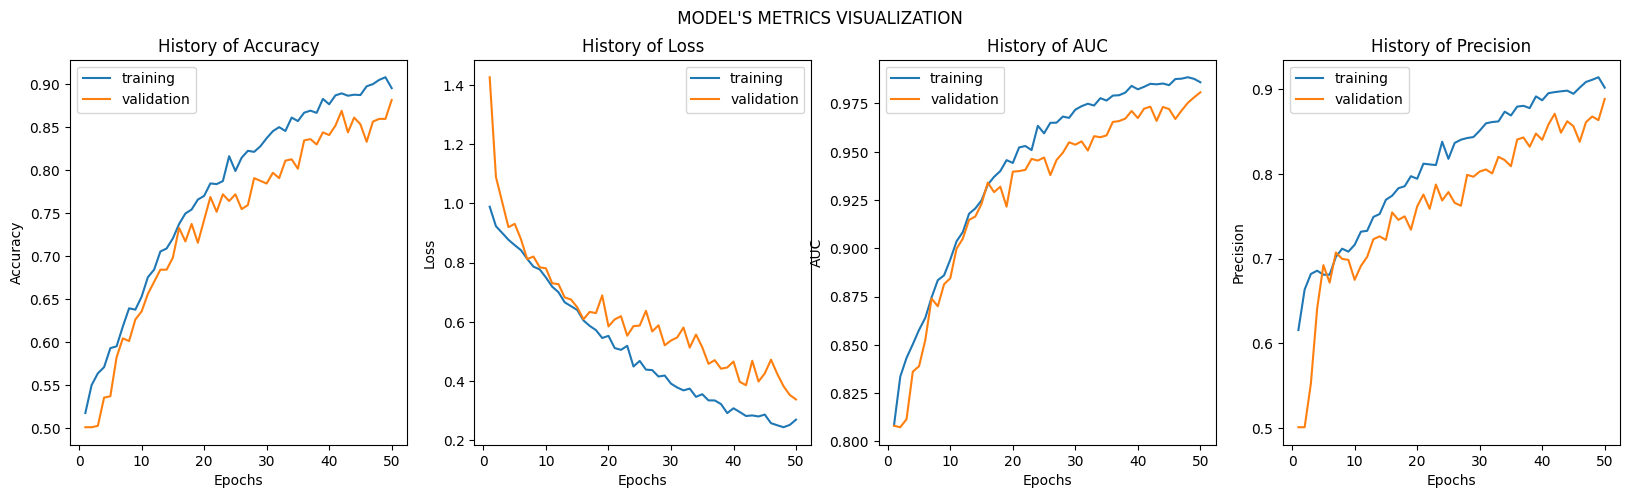

In [51]:
def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,):

    fig, (ax1, ax2,ax3,ax4) = plt.subplots(1,4, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])

    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])

    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])




    plt.show()


Train_Val_Plot(history3.history['accuracy'],history3.history['val_accuracy'],
               history3.history['loss'],history3.history['val_loss'],
               history3.history['auc'],history3.history['val_auc'],
               history3.history['precision'],history3.history['val_precision']
              )

In [52]:
result = model2.evaluate(train_generator)
train_loss = result[0]
train_accuracy = result[1]
train_AUC = result[2]
train_pre = result[3]
train_rec = result[4]
print(f'Train Loss = {train_loss}')
print(f'Train Accuracy = {train_accuracy}')
print(f'Train AUC = {train_AUC}')
print(f'Train Precision = {train_pre}')
print(f'Train Recall = {train_rec}')


80/80 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.9216 - auc: 0.9922 - loss: 0.2099 - precision: 0.9295 - recall: 0.9148
Train Loss = 0.20933839678764343
Train Accuracy = 0.9222504496574402
Train AUC = 0.9921234250068665
Train Precision = 0.9301725625991821
Train Recall = 0.9159992337226868


In [53]:
filepath = './Resnet101_best_weights.keras'

earlystopping = EarlyStopping(monitor = 'val_accuracy',
                              mode = 'max' ,
                              patience = 15,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath,
                                monitor = 'val_accuracy',
                                mode='max',
                                save_best_only=True,
                                verbose = 1)


callback_list = [earlystopping, checkpoint]

In [54]:
history2=model2.fit(train_generator,
                        validation_data=validation_generator,
                        steps_per_epoch=len(train_generator)//32,
                        epochs = 20,callbacks = callback_list,
                        verbose = 1,batch_size=16)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8672 - auc: 0.9826 - loss: 0.3050 - precision: 0.8842 - recall: 0.8633
Epoch 1: val_accuracy improved from -inf to 0.88106, saving model to ./Resnet101_best_weights.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 26s 24s/step - accuracy: 0.8750 - auc: 0.9839 - loss: 0.2905 - precision: 0.8932 - recall: 0.8698 - val_accuracy: 0.8811 - val_auc: 0.9809 - val_loss: 0.3307 - val_precision: 0.8906 - val_recall: 0.8795
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9012 - auc: 0.9882 - loss: 0.2558 - precision: 0.8992 - recall: 0.8815
Epoch 2: val_accuracy improved from 0.88106 to 0.88263, saving model to ./Resnet101_best_weights.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 30s 28s/step - accuracy: 0.9000 - auc: 0.9879 - loss: 0.2589 - precision: 0.8978 - recall: 0.8790 - val_accuracy: 0.8826 - val_auc: 0.9815 - val_loss: 0.3234 - val_precision: 0.8963 - val_recall: 0.8795
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9297 - auc: 0.98

In [55]:
model2.evaluate(test_generator)

11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.8770 - auc: 0.9795 - loss: 0.3477 - precision: 0.8816 - recall: 0.8739


[0.388794481754303,
 0.8598130941390991,
 0.9754648208618164,
 0.8659306168556213,
 0.855140209197998]

In [56]:
result = model2.evaluate(test_generator)
test_loss = result[0]
test_accuracy = result[1]
test_AUC = result[2]
test_pre = result[3]
test_rec = result[4]
print(f'Test Loss = {test_loss}')
print(f'Test Accuracy = {test_accuracy}')
print(f'Test AUC = {test_AUC}')
print(f'Test Precision = {test_pre}')
print(f'Test Recall = {test_rec}')
acc.append(test_accuracy*100)

11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.8693 - auc: 0.9793 - loss: 0.3479 - precision: 0.8796 - recall: 0.8641
Test Loss = 0.388794481754303
Test Accuracy = 0.8598130941390991
Test AUC = 0.9754648208618164
Test Precision = 0.8659306168556213
Test Recall = 0.855140209197998


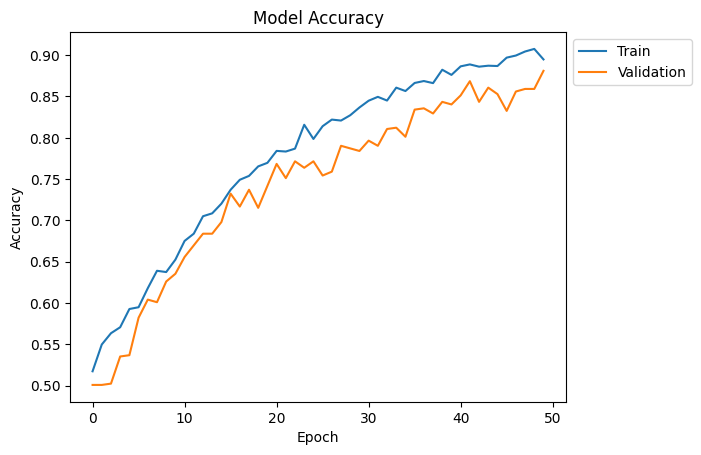

In [57]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [58]:
# Generate predictions
train_predictions = model2.predict(train_generator)
train_predicted_labels = np.argmax(train_predictions, axis=1)
train_true_labels = train_generator.classes

validation_predictions = model2.predict(validation_generator)
validation_predicted_labels = np.argmax(validation_predictions, axis=1)
validation_true_labels = validation_generator.classes

test_predictions = model2.predict(test_generator)
test_predicted_labels = np.argmax(test_predictions, axis=1)
test_true_labels = test_generator.classes

# Calculate confusion matrices
train_cm = confusion_matrix(train_true_labels, train_predicted_labels)
validation_cm = confusion_matrix(validation_true_labels, validation_predicted_labels)
test_cm = confusion_matrix(test_true_labels, test_predicted_labels)

# Define class labels (modify based on your specific problem)
class_labels = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

80/80 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# **Confusion Matrix**

Confusion matrix, without normalization


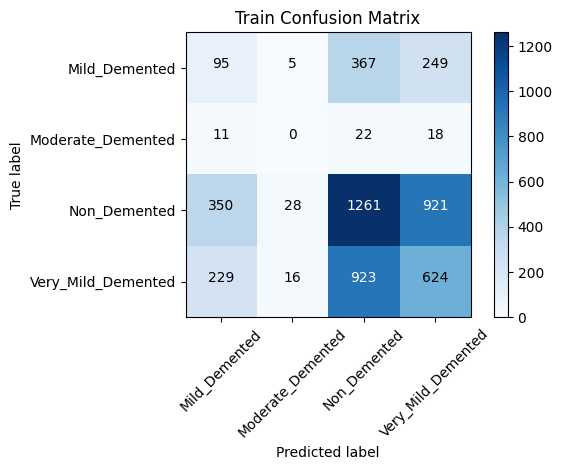

Confusion matrix, without normalization


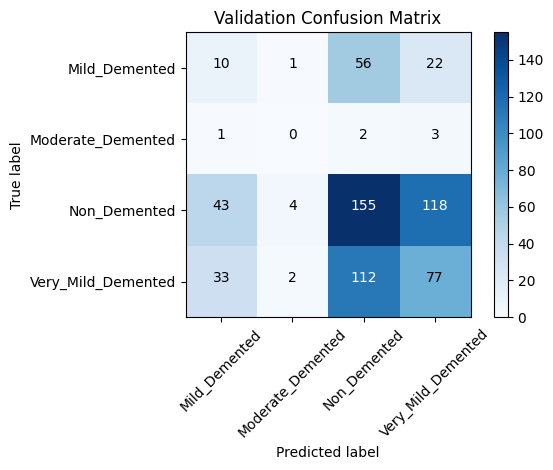

Confusion matrix, without normalization


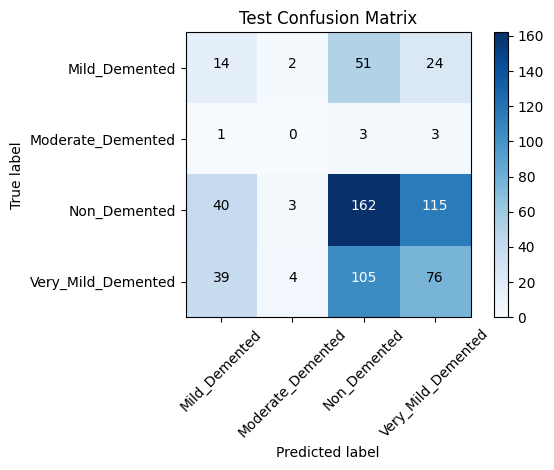

In [60]:
import itertools
# Calculate confusion matrices
train_cm = confusion_matrix(train_true_labels, train_predicted_labels)
validation_cm = confusion_matrix(validation_true_labels, validation_predicted_labels)
test_cm = confusion_matrix(test_true_labels, test_predicted_labels)

# Define class labels (modify based on your specific problem)
class_labels = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

# Plot confusion matrices
plot_confusion_matrix(train_cm, classes=class_labels, title='Train Confusion Matrix')
plt.show()

plot_confusion_matrix(validation_cm, classes=class_labels, title='Validation Confusion Matrix')
plt.show()

plot_confusion_matrix(test_cm, classes=class_labels, title='Test Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


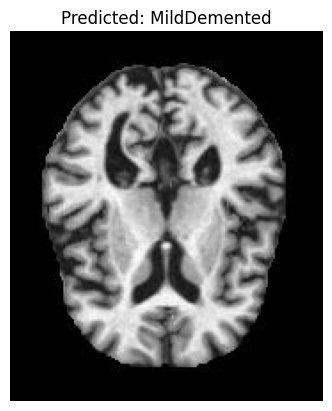

Prediction Probabilities: [[9.9743217e-01 8.9688019e-06 8.0099917e-04 1.7578584e-03]]
Predicted Class: MildDemented


In [63]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess the image
def preprocess_image(image_path, target_size=(128, 128)):
    """
    Preprocess a single image for prediction.
    Args:
        image_path (str): Path to the image file.
        target_size (tuple): Desired target size for the image.
    Returns:
        numpy.ndarray: Preprocessed image ready for model prediction.
    """
    # Load the image with target size
    img = load_img(image_path, target_size=target_size)

    # Convert the image to a numpy array
    img_array = img_to_array(img)

    # Rescale pixel values to the range [0, 1]
    img_array = img_array / 255.0

    # Expand dimensions to match the model input shape
    img_array = np.expand_dims(img_array, axis=0)

    return img_array

# Path to the single test image
test_image_path = './content/output/test/MildDemented/10 (27).jpg'

# Preprocess the image
preprocessed_image = preprocess_image(test_image_path)

# Make predictions using the trained model
predictions = model2.predict(preprocessed_image)

# Extract class with the highest probability
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Map class index to class name
predicted_class_name = class_names[predicted_class_index]

# Visualize the image and prediction
plt.imshow(load_img(test_image_path))
plt.title(f"Predicted: {predicted_class_name}")
plt.axis('off')
plt.show()

# Print prediction probabilities and class
print("Prediction Probabilities:", predictions)
print(f"Predicted Class: {predicted_class_name}")
